In [10]:
import numpy as np
import splitfolders
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import os
import cv2

In [11]:
splitfolders.ratio('data', output="data_split", seed=42, ratio=(0.8, 0.1, 0.1)) # default values

In [12]:
def load_images(folder, size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if not os.path.isdir(label_folder):
            continue
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, size)
                images.append(img.flatten())
                labels.append(label)
    return np.array(images), np.array(labels)

X_train, y_train = load_images("data_split/train")
X_test, y_test = load_images("data_split/test")

# Min-Max Scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_enc)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
y_pred = knn.predict(X_test_pca)

In [17]:
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

          no       0.71      0.91      0.80        11
         yes       0.92      0.75      0.83        16

    accuracy                           0.81        27
   macro avg       0.82      0.83      0.81        27
weighted avg       0.84      0.81      0.82        27



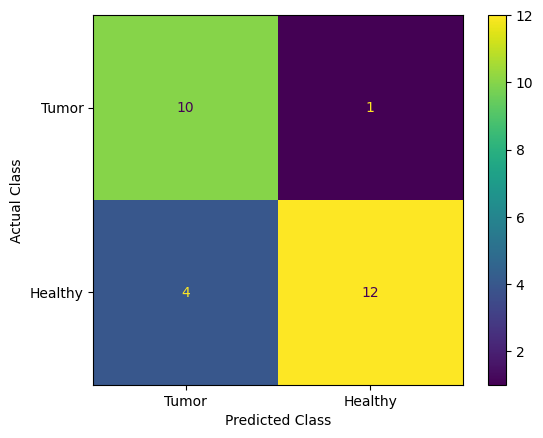

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test_enc, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Tumor", "Healthy"])

cm_display.plot()
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()